In [1]:
pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('white')
import sys
sys.path.append('/users/amyskerry/documents/projects/aesutil')
import bigquery.db as bqdb

In [3]:
#connect to project via project_id
project_id = 'durable-footing-95814'
client = bqdb.bigquery_connect(project_id=project_id)

In [4]:
tablename = '[bigquery-samples:airline_ontime_data.flights]' #format: project:dataset.tablename
#if dataset in current project_id, just dataset.tablename

In [5]:
#execute arbitrary sql commands and return as df
querystr = """
SELECT date, departure_state, AVG(departure_delay) avg , COUNT(*) c
FROM %s 
WHERE departure_state = 'NY'
GROUP BY 1,2 HAVING c > 5
ORDER BY 1 LIMIT 1000
""" %tablename
df = bqdb.bigquery_query(querystr, client)

Waiting on bqjob_r5daf3523c0db5bea_0000014e2aeb236a_1 ... (0s) Current status: DONE   


In [5]:
#create bqdb table connection
bqdf = bqdb.BQDF(client, tablename)

In [7]:
# view columns
bqdf.col_names

Waiting on bqjob_r61365ce420b5c240_0000014e2aeb29e9_2 ... (0s) Current status: DONE   


[u'date',
 u'airline',
 u'airline_code',
 u'departure_airport',
 u'departure_state',
 u'departure_lat',
 u'departure_lon',
 u'arrival_airport',
 u'arrival_state',
 u'arrival_lat',
 u'arrival_lon',
 u'departure_schedule',
 u'departure_actual',
 u'departure_delay',
 u'arrival_schedule',
 u'arrival_actual',
 u'arrival_delay']

In [8]:
# view schema details
bqdf.table_schema

Waiting on bqjob_r11c2c447a4faa149_0000014e2aeb2c72_3 ... (0s) Current status: DONE   
Table Schema for [bigquery-samples:airline_ontime_data.flights]
date (STRING) :   mode-NULLABLE
airline (STRING) :   mode-NULLABLE
airline_code (STRING) :   mode-NULLABLE
departure_airport (STRING) :   mode-NULLABLE
departure_state (STRING) :   mode-NULLABLE
departure_lat (FLOAT) :   mode-NULLABLE
departure_lon (FLOAT) :   mode-NULLABLE
arrival_airport (STRING) :   mode-NULLABLE
arrival_state (STRING) :   mode-NULLABLE
arrival_lat (FLOAT) :   mode-NULLABLE
arrival_lon (FLOAT) :   mode-NULLABLE
departure_schedule (INTEGER) :   mode-NULLABLE
departure_actual (INTEGER) :   mode-NULLABLE
departure_delay (FLOAT) :   mode-NULLABLE
arrival_schedule (INTEGER) :   mode-NULLABLE
arrival_actual (INTEGER) :   mode-NULLABLE
arrival_delay (FLOAT) :   mode-NULLABLE


In [9]:
#number of rows
bqdf.table_length

Waiting on bqjob_r5b2f31eb7910a539_0000014e2aeb2ffe_4 ... (0s) Current status: DONE   


70588485

In [10]:
bqdf.unique('departure_state')

SELECT departure_state FROM [bigquery-samples:airline_ontime_data.flights] GROUP BY departure_state
Waiting on bqjob_r69d9e8958f7ec472_0000014e2aeb3bac_5 ... (0s) Current status: DONE   


array(['VA', 'PA', 'NC', 'TX', 'IN', 'DE', 'FL', 'NY', 'AR', 'MS', 'OK',
       'MI', 'IL', 'NH', 'CA', 'NJ', 'LA', 'WI', 'AZ', 'NM', 'ID', 'KY',
       'OH', 'CO', 'HI', 'MO', 'AK', 'CT', 'UT', 'NV', 'PR', 'GA', 'TN',
       'MN', 'MD', 'IA', 'MA', 'OR', 'NE', 'WA', 'AL', 'KS', 'SC', 'VT',
       'RI', 'MT', 'ND', 'WY', 'SD', 'WV', 'VI', 'ME', 'TT'], dtype=object)

Waiting on bqjob_r4cdec1baaec371f0_0000014e2aeb3f56_6 ... (0s) Current status: DONE   


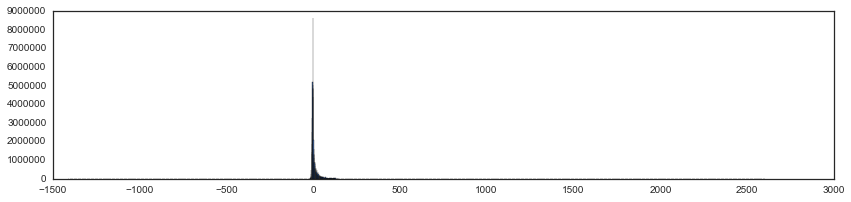

In [11]:
countdf=bqdf.hist('departure_delay')

Waiting on bqjob_r30e95fca8d19a51e_0000014e2aed40fe_2 ... (0s) Current status: DONE   
truncating to median +/- 0.5 * STD


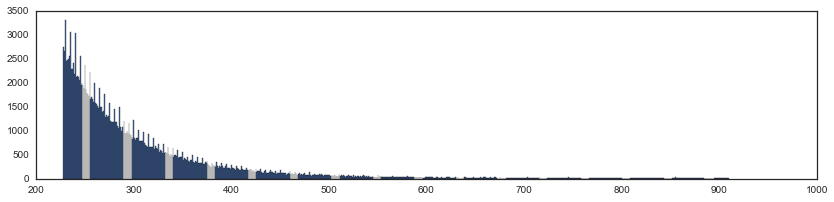

In [7]:
countdf=bqdf.hist('departure_delay', truncate=.5)

Waiting on bqjob_r7afe5af5127a0233_0000014e2af45a4f_8 ... (0s) Current status: DONE   
truncating to median +/- 1 * STD
subsampling at intervals of 6


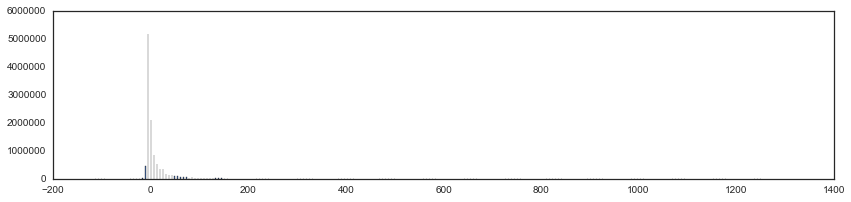

In [13]:
countdf=bqdf.hist('departure_delay', truncate=1, subsample=200)

In [7]:
groupdf=bqdf.groupby('departure_state', [('departure_delay','min'), ('departure_delay','mean')])

SELECT departure_state, COUNT(*) count, MIN(departure_delay) departure_delay_min , AVG(departure_delay) departure_delay_mean  FROM [bigquery-samples:airline_ontime_data.flights] GROUP BY departure_state LIMIT 10000
Waiting on bqjob_r4515891cb730f2ba_0000014e2e77b80f_2 ... (0s) Current status: DONE   
